# NLP (Natural Language Processing)

In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/usuario/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tokenización

* Ejemplo sin tokenizar: La casa es azul y es una casa
* Ejemplo tokenizado: ['la', 'casa', 'es', 'y', 'una', 'azul']

In [3]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

text = "El perro corre rápido y es un perro"

[nltk_data] Downloading package punkt to /home/usuario/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:

tokens = word_tokenize(text)
print(tokens)

['El', 'perro', 'corre', 'rápido', 'y', 'es', 'un', 'perro']


Normalización

In [5]:
import re

texto = "El PERRO corre RÁPIDO!!!"
texto_normalizado = re.sub(r'[^\w\s]', '', texto.lower())
print(texto_normalizado)

el perro corre rápido


Eliminar Stop Words

In [6]:
from nltk.corpus import stopwords
nltk.download('stopwords')

texto = "El perro corre rápido"
stop_words = set(stopwords.words('spanish'))
tokens = word_tokenize(texto.lower())
tokens_filtrados = [word for word in tokens if word not in stop_words]
print(tokens_filtrados)

['perro', 'corre', 'rápido']


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/usuario/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Lematización

In [7]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 10.5 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [8]:
import spacy

nlp = spacy.load('es_core_news_sm')

texto = "El perro está corriendo rápido"

doc = nlp(texto)

tokens_lemantizados = [token.lemma_ for token in doc]
print(tokens_lemantizados)

['el', 'perro', 'estar', 'correr', 'rápido']


Steamming

In [9]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('spanish')
texto = "El perro está corriendo rápido"
tokens = word_tokenize(texto.lower())

# Aplicar stemming
tokens_stemmed = [stemmer.stem(token) for token in tokens]
print(tokens_stemmed)

['el', 'perr', 'esta', 'corr', 'rap']


## Representación / Encoding

Bolsa de Palabras

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

textos = ["el perro corre rápido", "el gato corre rápido"]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(textos)
print(vectorizer.get_feature_names_out())
print(X.toarray())

['corre' 'el' 'gato' 'perro' 'rápido']
[[1 1 0 1 1]
 [1 1 1 0 1]]


TF-IDF (Term Frequency-Inverse Document Frequency)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

textos = ["el perro corre rápido", "el gato corre rápido"]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(textos)

print(vectorizer.get_feature_names_out())
print(X.toarray())

['corre' 'el' 'gato' 'perro' 'rápido']
[[0.44832087 0.44832087 0.         0.63009934 0.44832087]
 [0.44832087 0.44832087 0.63009934 0.         0.44832087]]


# The Dataset

In [53]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


data = pd.read_csv('spam.csv', encoding='latin-1')
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
data.columns = ['label', 'sms_message']

data

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
def limpiar_texto(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    return text

data['message_clean'] = data['sms_message'].apply(limpiar_texto)
data

,label,sms_message,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?,will ì_ b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggest...
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like id ...


In [15]:
# Tokenización
data['tokens'] = data['message_clean'].apply(word_tokenize)
data

,label,sms_message,message_clean,tokens
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,..."
5568,ham,Will Ì_ b going to esplanade fr home?,will ì_ b going to esplanade fr home,"[will, ì_, b, going, to, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggest...,"[pity, was, in, mood, for, that, soany, other,..."
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like id ...,"[the, guy, did, some, bitching, but, i, acted,..."


In [16]:
# Eliminar stopwords
stop_words = set(stopwords.words('english'))
data['tokens'] = data['tokens'].apply(lambda x: [palabra for palabra in x if palabra not in stop_words])
data

,label,sms_message,message_clean,tokens
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, dont, think, goes, usf, lives, around, t..."
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,"[2nd, time, tried, 2, contact, u, u, å750, pou..."
5568,ham,Will Ì_ b going to esplanade fr home?,will ì_ b going to esplanade fr home,"[ì_, b, going, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggest...,"[pity, mood, soany, suggestions]"
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like id ...,"[guy, bitching, acted, like, id, interested, b..."


In [17]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/usuario/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
# Lematización
lemmatizer = WordNetLemmatizer()
data['tokens_lemmatized'] = data['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
data

,label,sms_message,message_clean,tokens,tokens_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, go, usf, life, around, though]"
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,"[2nd, time, tried, 2, contact, u, u, å750, pou...","[2nd, time, tried, 2, contact, u, u, å750, pou..."
5568,ham,Will Ì_ b going to esplanade fr home?,will ì_ b going to esplanade fr home,"[ì_, b, going, esplanade, fr, home]","[ì_, b, going, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggest...,"[pity, mood, soany, suggestions]","[pity, mood, soany, suggestion]"
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like id ...,"[guy, bitching, acted, like, id, interested, b...","[guy, bitching, acted, like, id, interested, b..."


In [19]:
# Unir tokens lematizados en una única cadena de texto
data['processed_message'] = data['tokens_lemmatized'].apply(lambda x: ' '.join(x))
data

,label,sms_message,message_clean,tokens,tokens_lemmatized,processed_message
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, go, usf, life, around, though]",nah dont think go usf life around though
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,"[2nd, time, tried, 2, contact, u, u, å750, pou...","[2nd, time, tried, 2, contact, u, u, å750, pou...",2nd time tried 2 contact u u å750 pound prize ...
5568,ham,Will Ì_ b going to esplanade fr home?,will ì_ b going to esplanade fr home,"[ì_, b, going, esplanade, fr, home]","[ì_, b, going, esplanade, fr, home]",ì_ b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggest...,"[pity, mood, soany, suggestions]","[pity, mood, soany, suggestion]",pity mood soany suggestion
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like id ...,"[guy, bitching, acted, like, id, interested, b...","[guy, bitching, acted, like, id, interested, b...",guy bitching acted like id interested buying s...


In [20]:
# Verificar los datos procesados
#print(data[['label', 'processed_message']])
data

,label,sms_message,message_clean,tokens,tokens_lemmatized,processed_message
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, go, usf, life, around, though]",nah dont think go usf life around though
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,"[2nd, time, tried, 2, contact, u, u, å750, pou...","[2nd, time, tried, 2, contact, u, u, å750, pou...",2nd time tried 2 contact u u å750 pound prize ...
5568,ham,Will Ì_ b going to esplanade fr home?,will ì_ b going to esplanade fr home,"[ì_, b, going, esplanade, fr, home]","[ì_, b, going, esplanade, fr, home]",ì_ b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggest...,"[pity, mood, soany, suggestions]","[pity, mood, soany, suggestion]",pity mood soany suggestion
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like id ...,"[guy, bitching, acted, like, id, interested, b...","[guy, bitching, acted, like, id, interested, b...",guy bitching acted like id interested buying s...


# Modelo de clasificacion de spam

In [21]:
#bolsa de palabras
vectorizador = CountVectorizer()

#aplicar el vectorizador a nuestro dataset
X = vectorizador.fit_transform(data['processed_message'])


In [22]:
#Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.2, random_state=42)

#crear y entrenar el modelo
modelo = MultinomialNB()
modelo.fit(x_train, y_train)

#predecir los resultados
y_pred = modelo.predict(x_test)

#evaluar el modelo
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.99      0.98      0.98       965
        spam       0.90      0.91      0.90       150

    accuracy                           0.97      1115
   macro avg       0.94      0.95      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Accuracy: 0.9739910313901345


In [23]:
#cross-validation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB

cv_mnb = cross_val_score(MultinomialNB(), X, data['label'], cv=5)
print("Cross-validation scores: ", cv_mnb)

Cross-validation scores:  [0.97488789 0.97757848 0.97486535 0.97307002 0.97127469]


In [24]:
#TF-IDF
vectorizador2 = TfidfVectorizer(stop_words='english')
X = vectorizador2.fit_transform(data['processed_message'])

In [25]:
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(X, data['label'], test_size=0.2, random_state=42)

In [26]:
modelo2 = MultinomialNB()
modelo2.fit(x_entrenamiento, y_entrenamiento)

MultinomialNB()

In [27]:
y_prediccion = modelo2.predict(x_prueba)

In [28]:
print(classification_report(y_prueba, y_prediccion))
print("accuracy_score: ", accuracy_score(y_prueba, y_prediccion))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.73      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115

accuracy_score:  0.9632286995515695


In [29]:
#Regresion logistica
vectorizador3 = CountVectorizer(stop_words='english', max_features=1000)

x = vectorizador3.fit_transform(data['processed_message'])


In [30]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x, data['label'], test_size=0.2, random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=16)
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

modelo3 = LogisticRegression()
modelo3.fit(x_train3, y_train3)



LogisticRegression()

In [32]:
y_pred3 = modelo3.predict(x_test3)
accuracy_score(y_test3, y_pred3)

0.9757847533632287

In [33]:
print(classification_report(y_test3, y_pred3))
print("accuracy_score: ", accuracy_score(y_test3, y_pred3))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       0.99      0.83      0.90       150

    accuracy                           0.98      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115

accuracy_score:  0.9757847533632287


# Análisis de sentimientos

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

In [35]:
datos = pd.read_csv('/home/usuario/Proyectos/talentoTech/data_nlp.csv')

In [36]:
datos

,UserId,ProductId,Product Name,Summary,Text
0,AU2LNDRGFOS8J,7310172101,Dog Treat,very good,This product is a very health snack for your p...
1,A3RRSB7FFM07ZU,7310172101,Dog Treat,Dogs Love These!,My girls love these. I cut them up smaller and...
2,AFH6TT0SWN59L,7310172101,Dog Treat,Fast shipment,This is 2.5 oz larger than what you can find i...
3,ALAA0P3GK1VBR,7310172101,Dog Treat,Dogs Love It,I have one dog that is a picky eater. I crumbl...
4,A3EKHSRZKXRIFK,7310172101,Dog Treat,Golden loves them!,My Golden can get picky and eating is not a pr...
...,...,...,...,...,...
1077,A3T0OTH5072YRE,B004Z33GI6,Lemonade,Honest Ade Classic Lemonade,"This was pretty bad. Not completely terrible,..."
1078,A1UUPKHLG9MR9L,B004Z33GI6,Lemonade,Awful.,This stuff is terrible. There must be a huge ...
1079,A1N65D9MJX89GI,B004Z33GI6,Lemonade,AMAZING AND ADDICTING!,This is the best and most delicious 0-cal drin...
1080,AELQNIEEB4Y40,B004Z33GI6,Lemonade,Beware..your results may vary,This product is very hit or miss for people. I...


In [37]:
def agregar_columna_sentimientos(texto):
    palabras_positivas = ['good', 'great', 'love', 'best', 'wonderful', 'delightful', 'excellent']
    palabras_negativas = ['bad', 'worst', 'terrible', 'awful', 'disappointing', 'poor', 'hate']
    
    texto.lower()
    puntaje_positivo = sum(palabra in texto for palabra in palabras_positivas)
    puntaje_negativo = sum(palabra in texto for palabra in palabras_negativas)
    
    return 1 if puntaje_positivo > puntaje_negativo else 0 if puntaje_negativo > 0 else -1

In [38]:
datos['sentimiento'] = datos['Text'].apply(agregar_columna_sentimientos)
datos 

,UserId,ProductId,Product Name,Summary,Text,sentimiento
0,AU2LNDRGFOS8J,7310172101,Dog Treat,very good,This product is a very health snack for your p...,-1
1,A3RRSB7FFM07ZU,7310172101,Dog Treat,Dogs Love These!,My girls love these. I cut them up smaller and...,1
2,AFH6TT0SWN59L,7310172101,Dog Treat,Fast shipment,This is 2.5 oz larger than what you can find i...,-1
3,ALAA0P3GK1VBR,7310172101,Dog Treat,Dogs Love It,I have one dog that is a picky eater. I crumbl...,1
4,A3EKHSRZKXRIFK,7310172101,Dog Treat,Golden loves them!,My Golden can get picky and eating is not a pr...,1
...,...,...,...,...,...,...
1077,A3T0OTH5072YRE,B004Z33GI6,Lemonade,Honest Ade Classic Lemonade,"This was pretty bad. Not completely terrible,...",0
1078,A1UUPKHLG9MR9L,B004Z33GI6,Lemonade,Awful.,This stuff is terrible. There must be a huge ...,0
1079,A1N65D9MJX89GI,B004Z33GI6,Lemonade,AMAZING AND ADDICTING!,This is the best and most delicious 0-cal drin...,1
1080,AELQNIEEB4Y40,B004Z33GI6,Lemonade,Beware..your results may vary,This product is very hit or miss for people. I...,-1


In [39]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(datos['Text'], datos['sentimiento'], test_size=0.2, random_state=42)

In [40]:
pipeline = Pipeline([
    ('vectorizador', CountVectorizer(stop_words='english')),
    ('modelo_NB', MultinomialNB())
])

pipeline.fit(x_train4, y_train4)
y_prediccion4 = pipeline.predict(x_test4)

In [41]:
accuracy_score4 = accuracy_score(y_test4, y_prediccion4)
reporte_score4 = classification_report(y_test4, y_prediccion4)

In [42]:
print(accuracy_score4, reporte_score4)


0.6267281105990783               precision    recall  f1-score   support

          -1       0.62      0.24      0.35        75
           0       0.53      0.70      0.60        27
           1       0.65      0.86      0.74       115

    accuracy                           0.63       217
   macro avg       0.60      0.60      0.56       217
weighted avg       0.63      0.63      0.59       217



In [43]:
#Matriz de confucion
vectorizador4 = CountVectorizer(stop_words='english')
x4 = vectorizador4.fit_transform(datos['Text'])

nombre_features = vectorizador4.get_feature_names_out()

print(nombre_features)
print(x4.toarray())

['00' '000' '05' ... 'ziploc' 'zipper' 'zucchini']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [44]:
datos_completos = pd.DataFrame(x4.toarray(), columns=nombre_features )
print(datos_completos.head())

   00  000  05  0631  07036  0790700506  08  09  0z  10  ...  zenith  zero  \
0   0    0   0     0      0           0   0   0   0   0  ...       0     0   
1   0    0   0     0      0           0   0   0   0   0  ...       0     0   
2   0    0   0     0      0           0   0   0   0   0  ...       0     0   
3   0    0   0     0      0           0   0   0   0   0  ...       0     0   
4   0    0   0     0      0           0   0   0   0   0  ...       0     0   

   zest  zig  zing  zinginess  zip  ziploc  zipper  zucchini  
0     0    0     0          0    0       0       0         0  
1     0    0     0          0    0       0       0         0  
2     0    0     0          0    0       0       0         0  
3     0    0     0          0    0       0       0         0  
4     0    0     0          0    0       0       0         0  

[5 rows x 6907 columns]


In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

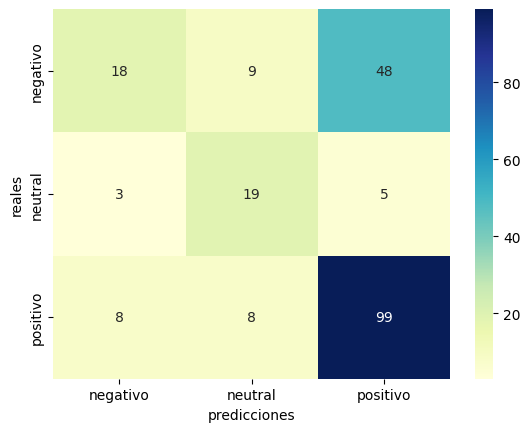

In [46]:
cm = confusion_matrix(y_test4, y_prediccion4)
labels = ['negativo', 'neutral', 'positivo']
cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.heatmap(cm, annot=True, fmt='g', cmap='YlGnBu')
plt.xlabel('predicciones')
plt.ylabel('reales')
plt.show()

In [47]:
def predecir_sentimiento(texto, pipeline_entrenado):
    texto_procesado = texto.lower()
    print(texto_procesado)
    prediccion = pipeline_entrenado.predict([texto_procesado])
    
    
    return prediccion[0] 

In [48]:
texto = 'the model s '
texto

'the model s '

In [53]:
#
sentimiento = predecir_sentimiento(texto, pipeline)
if sentimiento == 1:
    print("El sentimiento es positivo")
else:
    if sentimiento == 0:
        print("El sentimiento es negativo")
    else:
        print('El sentimiento es neutro')

the model s 
El sentimiento es positivo


# Analisis de sentimiento usando Vader

In [71]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/usuario/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
from sklearn.model_selection import train_test_split

In [4]:
#col_resumen = 'Sumary'
#for i.resumen in enumerate(datos[col_resumen]):
#    print('i:', i, 'Resumen:', i.resumen)

In [3]:
from collections import defaultdict, Counter

# Ejercicio

In [71]:
df5 = pd.read_csv('https://raw.githubusercontent.com/eleanorstrib/twitter_timeline_analysis_1/refs/heads/master/NASA_tweets.csv', encoding='latin-1')
df5

,id,full_text,hashtags,urls,created_at,favorite_count,retweet_count,source
0,1013558869728071685,"RT @NASA_Johnson: This week on ""Houston, We Ha...",[],[],Sun Jul 01 23:04:00 +0000 2018,0,96,Sprinklr
1,1013529203990581249,"In this week's #STEMonStation, @astro_ricky de...",['STEMonStation'],['https://youtu.be/34bFgA3H3hQ'],Sun Jul 01 21:06:07 +0000 2018,1587,429,Sprinklr
2,1013498567309348864,"Could these tiny, electricity-producing bacter...",[],['https://youtu.be/KhsCg7pmv0o'],Sun Jul 01 19:04:22 +0000 2018,1869,515,Sprinklr
3,1013486392134062080,RT @NASAInterns: Ready to be part of the futur...,['scientific'],[],Sun Jul 01 18:16:00 +0000 2018,0,250,Sprinklr
4,1013477085279551488,Weâre inviting social media users to go behi...,['TwilightZone'],['https://go.nasa.gov/2KFd8Ka'],Sun Jul 01 17:39:01 +0000 2018,1167,262,Sprinklr
...,...,...,...,...,...,...,...,...
3240,918229105706971137,Finding billions of planets around other stars...,[],['http://go.nasa.gov/2xAmK3m'],Wed Oct 11 21:37:33 +0000 2017,2300,596,Sprinklr
3241,918198523610484737,Newly-adapted imaging procedures allow researc...,[],['http://go.nasa.gov/2kGGIDr'],Wed Oct 11 19:36:01 +0000 2017,1260,316,Sprinklr
3242,918177752473325568,"RT @Space_Station: LIVE NOW: @Astro_Kanai, @As...",[],[],Wed Oct 11 18:13:29 +0000 2017,0,140,Twitter Web Client
3243,918162536134037514,Meet the next three humans launching to @Space...,['askNASA'],['http://www.nasa.gov/live'],Wed Oct 11 17:13:01 +0000 2017,2252,506,Sprinklr


In [72]:
df5.shape

(3245, 8)

In [73]:
df5 = df5['full_text']
df5

0       RT @NASA_Johnson: This week on "Houston, We Ha...
1       In this week's #STEMonStation, @astro_ricky de...
2       Could these tiny, electricity-producing bacter...
3       RT @NASAInterns: Ready to be part of the futur...
4       Weâre inviting social media users to go behi...
                              ...                        
3240    Finding billions of planets around other stars...
3241    Newly-adapted imaging procedures allow researc...
3242    RT @Space_Station: LIVE NOW: @Astro_Kanai, @As...
3243    Meet the next three humans launching to @Space...
3244    .@NASAEarth satellites saw the northern Califo...
Name: full_text, Length: 3245, dtype: object

In [79]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

df5 = pd.read_csv('https://raw.githubusercontent.com/eleanorstrib/twitter_timeline_analysis_1/refs/heads/master/NASA_tweets.csv', encoding='latin-1')
# Keep the original DataFrame and create a new Series for the 'full_text' column
text_series = df5['full_text']  

# Apply the cleaning function to the Series
def limpiar_texto(text):
    text = re.sub(r'[^\w\s\@]', '', text.lower())
    return text

cleaned_text = text_series.apply(limpiar_texto)

# Assign the cleaned text back to the 'full_text' column in the original DataFrame
df5['full_text'] = cleaned_text 
df5

,id,full_text,hashtags,urls,created_at,favorite_count,retweet_count,source
0,1013558869728071685,rt @nasa_johnson this week on houston we have ...,[],[],Sun Jul 01 23:04:00 +0000 2018,0,96,Sprinklr
1,1013529203990581249,in this weeks stemonstation @astro_ricky demon...,['STEMonStation'],['https://youtu.be/34bFgA3H3hQ'],Sun Jul 01 21:06:07 +0000 2018,1587,429,Sprinklr
2,1013498567309348864,could these tiny electricityproducing bacteria...,[],['https://youtu.be/KhsCg7pmv0o'],Sun Jul 01 19:04:22 +0000 2018,1869,515,Sprinklr
3,1013486392134062080,rt @nasainterns ready to be part of the future...,['scientific'],[],Sun Jul 01 18:16:00 +0000 2018,0,250,Sprinklr
4,1013477085279551488,weâre inviting social media users to go behind...,['TwilightZone'],['https://go.nasa.gov/2KFd8Ka'],Sun Jul 01 17:39:01 +0000 2018,1167,262,Sprinklr
...,...,...,...,...,...,...,...,...
3240,918229105706971137,finding billions of planets around other stars...,[],['http://go.nasa.gov/2xAmK3m'],Wed Oct 11 21:37:33 +0000 2017,2300,596,Sprinklr
3241,918198523610484737,newlyadapted imaging procedures allow research...,[],['http://go.nasa.gov/2kGGIDr'],Wed Oct 11 19:36:01 +0000 2017,1260,316,Sprinklr
3242,918177752473325568,rt @space_station live now @astro_kanai @astro...,[],[],Wed Oct 11 18:13:29 +0000 2017,0,140,Twitter Web Client
3243,918162536134037514,meet the next three humans launching to @space...,['askNASA'],['http://www.nasa.gov/live'],Wed Oct 11 17:13:01 +0000 2017,2252,506,Sprinklr


In [74]:
def agregar_columna_sentimientos(texto):
    palabras_positivas = ['good', 'ready', 'full', 'best', 'wonderful', 'delightful', 'excellent']
    palabras_negativas = ['bad', 'worst', 'terrible', 'awful', 'disappointing', 'poor', 'hate']
    
    texto.lower()
    puntaje_positivo = sum(palabra in texto for palabra in palabras_positivas)
    puntaje_negativo = sum(palabra in texto for palabra in palabras_negativas)
    
    return 1 if puntaje_positivo > puntaje_negativo else 0 if puntaje_negativo > 0 else -1

In [75]:
df5['full_text'] = datos['Text'].apply(agregar_columna_sentimientos)
df5

/tmp/ipykernel_9140/1765546731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['full_text'] = datos['Text'].apply(agregar_columna_sentimientos)


0            RT @NASA_Johnson: This week on "Houston, We Ha...
1            In this week's #STEMonStation, @astro_ricky de...
2            Could these tiny, electricity-producing bacter...
3            RT @NASAInterns: Ready to be part of the futur...
4            Weâre inviting social media users to go behi...
                                   ...                        
3241         Newly-adapted imaging procedures allow researc...
3242         RT @Space_Station: LIVE NOW: @Astro_Kanai, @As...
3243         Meet the next three humans launching to @Space...
3244         .@NASAEarth satellites saw the northern Califo...
full_text    0      -1
1      -1
2      -1
3      -1
4     ...
Name: full_text, Length: 3246, dtype: object

In [78]:
x_train5, x_test5, y_train5, y_test5 = train_test_split(df5['full_text'], df5['sentimiento'], test_size=0.2, random_state=42)

KeyError: 'sentimiento'

In [77]:
pipeline = Pipeline([
    ('vectorizador', CountVectorizer(stop_words='english')),
    ('modelo_NB', MultinomialNB())
])

pipeline.fit(x_train4, y_train4)
y_prediccion4 = pipeline.predict(x_test4)

AttributeError: 'int' object has no attribute 'lower'